# **The Pima Indians Diabetes Dataset**

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Class variable (0 or 1).

The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 65%. Top results achieve a classification accuracy of approximately **77%**.


# Step 1: Load the Data and answering the question

In [5]:
# Get the dataset by raw URL
!wget https://github.com/hazmash5/ds-projects/raw/main/Proj_05_Diabetes/data/pima-indians-diabetes.csv

--2021-01-29 23:27:12--  https://github.com/hazmash5/ds-projects/raw/main/Proj_05_Diabetes/data/pima-indians-diabetes.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hazmash5/ds-projects/main/Proj_05_Diabetes/data/pima-indians-diabetes.csv [following]
--2021-01-29 23:27:12--  https://raw.githubusercontent.com/hazmash5/ds-projects/main/Proj_05_Diabetes/data/pima-indians-diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0s      

2021-01-29 23:27:13 (108

In [6]:
# Create new folder and name it data
!mkdir data

In [7]:
# Moving our datasets to the data folder
!mv pima-indians-diabetes.csv data/

In [ ]:
# Showing the first line of the dataset
!head -n 3 data/pima-indians-diabetes.csv

6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1


  We have 9 attributes and only one target columns.

In [ ]:
# Showing the number of lines.
!cat data/Dataset.csv | wc -l

769


We have 768 of instances

# Introduction
First of all I will use seven classification models to make real comparison between techniques to choose the best for our dataset, in the following shows Classification models names which I will use:

1.Logistic Regression

2.Linear Discriminant Analysis

3.K Neighbors Classifier

4.Decision Tree Classifier

5.Gaussian NB

6.Support Vector Classifier

7.XGBoost Classifier


# Step 2: Exploratory analysis and Check data for problems 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))

In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df

,No_preg,plas,pres_mm,skin_mm,insu,BMI,DPF,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

It is a **nominal binary** classification problem (0 and 1), there is unbalance issue must be considered.

## using pie plot
I used pie plot to visualize and compute the difference between the categories

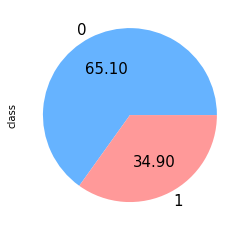

In [ ]:
pd.value_counts(df['class']).plot(kind='pie', autopct='%.2f',fontsize=15, colors= ['#66b3ff','#ff9999'])

## Using box plot
I used box plot to have an indication of how the values in the data are spread out, and to visualize the distribution of values within each attributes.

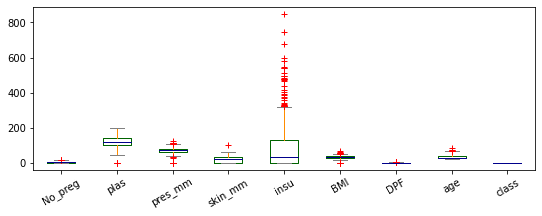

In [ ]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df.plot(kind='box', color=color, sym='r+', figsize=(9,3), rot=30)


The attributes box plotting shows the following: 

1. All attributes values spread between 0 and 200 except E attribute,

2. There is no negative values,

3. E attribute have a lot of outliers exceed 200,

4. Each attribute have own distribution, so we must use scalers methods before training.

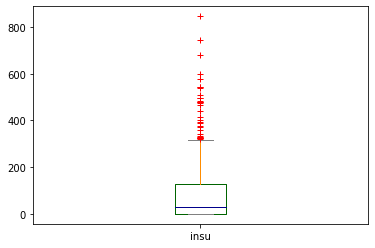

In [ ]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df['insu'].plot(kind='box', color=color, sym='r+')

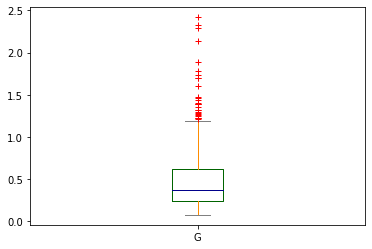

In [ ]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df['G'].plot(kind='box', color=color, sym='r+')

## Using Andrews curves
I used andrews curves plotting to visualize data clustering for each class, Curves belonging to samples of the same class will usually be closer together and form larger structures.

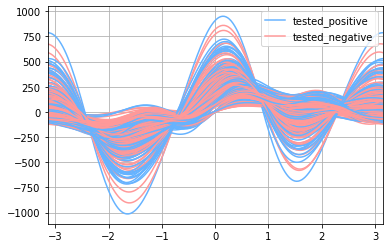

In [ ]:
pd.plotting.andrews_curves(df, 'class', color=['#66b3ff','#ff9999'])

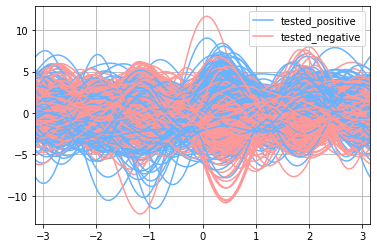

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
all_inputs = sc.fit_transform(all_inputs)
ddf= pd.DataFrame(all_inputs)
ddf['class']= all_labels
pd.plotting.andrews_curves(ddf, 'class', color=['#66b3ff','#ff9999'])

The curves of two classes are mixed. There is no way to distinguish between them. It is not sufficient to predict the target class using those features.

## Using Parallel coordinates plotting
I used Parallel coordinates to comparing variables together and seeing the relationships between them.

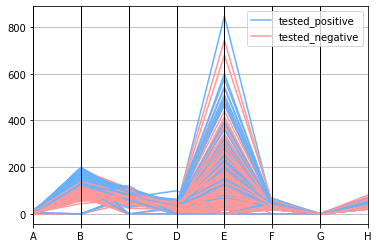

In [ ]:
pd.plotting.parallel_coordinates(df, 'class', color=['#66b3ff','#ff9999'])

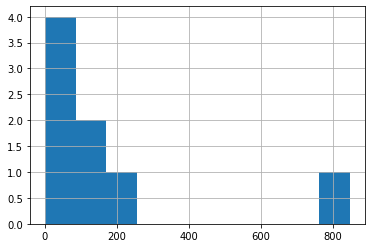

In [ ]:
df.describe().T['max'].hist()

The E attribute is confuse the plot so i will drop it.

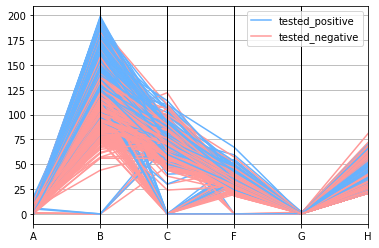

In [ ]:
pd.plotting.parallel_coordinates(df[['A', 'B', 'C', 'F', 'G', 'H', 
                                     'class']], 'class', color=['#66b3ff','#ff9999'])

In [ ]:
(df == 0).sum()

A        111
B          5
C         35
D        227
E        374
F         11
G          0
H          0
class      0
dtype: int64

The plotting show that features intersect at lots of zero points, it may expresses the missing values filling method. so I will consider it as **NaN values**. 
But the plot is very dense plot so i will use 10 rows.

In [ ]:
dfn=df[['A', 'B', 'C', 'F', 'G', 'H', 'class']].loc[1:10]

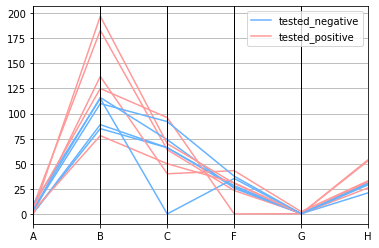

In [ ]:
pd.plotting.parallel_coordinates(dfn, 'class', color=['#66b3ff','#ff9999'])

There is no special fenomena for each class, the ranges is overlapping, we still see zeros points

## Using Radviz Plot
I used radviz plotting to recognize distinguished cluster for each class

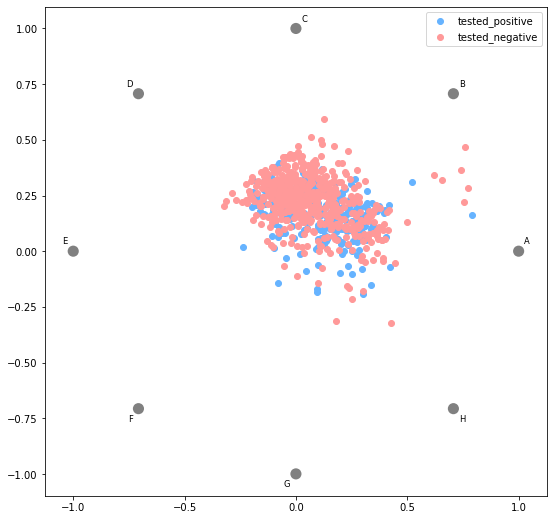

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
ddf= pd.DataFrame(all_inputs)
ddf.columns= df.columns[0:-1]
plt.figure(figsize=(9, 9))
ddf['class']= all_labels
pd.plotting.radviz(ddf, 'class', color=['#66b3ff','#ff9999'], )


There is no clear recognize distinguished cluster for each class to attributes as we saw in the previous figures.
We can see a lot of outliers corresponding to the negative tests class.

## Using hist plot

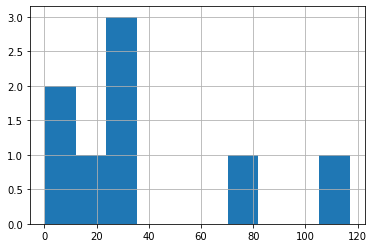

In [ ]:
df.median().hist()

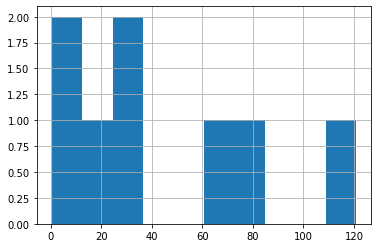

In [ ]:
df.describe().T['mean'].hist()

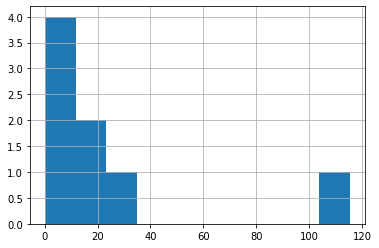

In [ ]:
df.describe().T['std'].hist()

The mode is the most frequent observation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f292cfae240>,
      dtype=object)

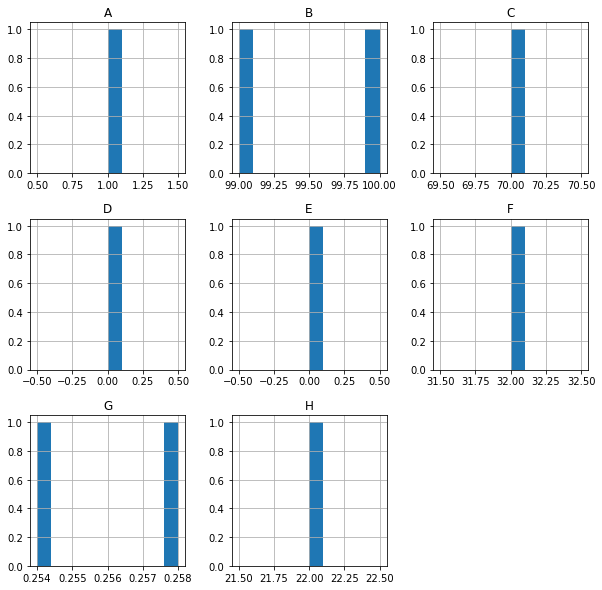

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.mode().hist(ax=ax)

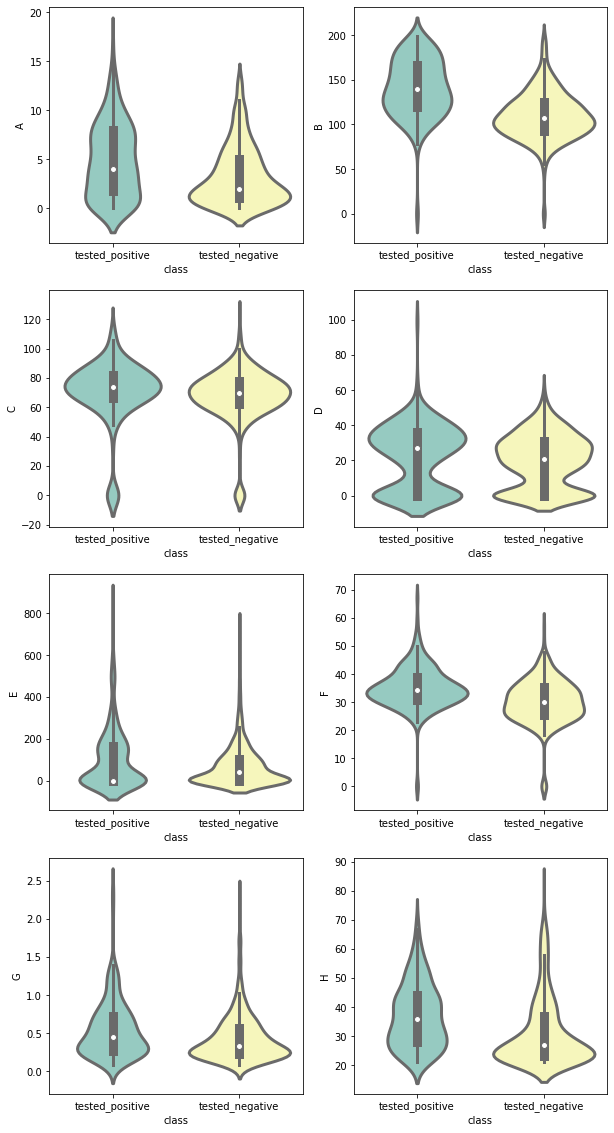

In [ ]:
plt.figure(figsize=(10, 20))

for column_index, column in enumerate(df):
    if column == 'class':
        continue
    plt.subplot(4, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=df, inner="box", palette="Set3", cut=2, linewidth=3)

Data Correlation

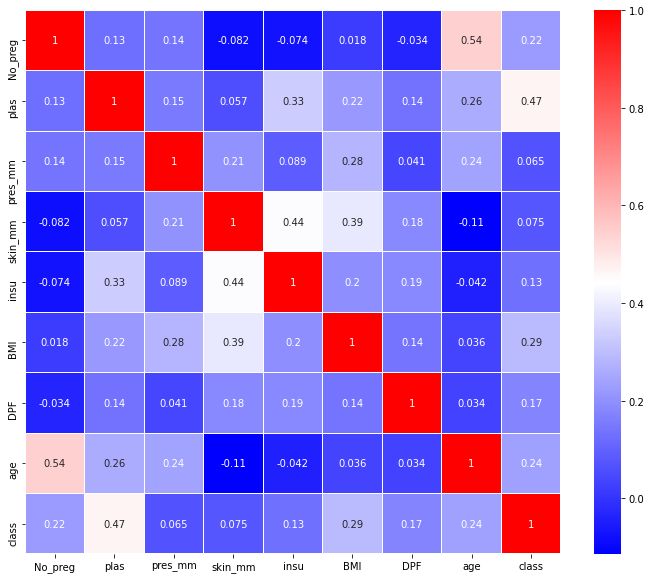

In [ ]:
plt.figure(figsize=(12, 10))
corrMatrix = df.corr()
sb.heatmap(corrMatrix, annot=True, cmap='bwr', linewidths=0.1)
plt.show()

# Step 3: Tidying the data


# Fill NaN Methods Comparison

In [ ]:
df.columns

Index(['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age',
       'class'],
      dtype='object')

In [ ]:
print('''Columns coud'nt be zero are: ''' , list(df.columns[1:6]))

Columns coud'nt be zero are:  ['plas', 'pres_mm', 'skin_mm', 'insu', 'BMI']


In [ ]:
(df['age']==0).sum()

0

In [ ]:
# Redefining zeros into NaN values
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)
df

,No_preg,plas,pres_mm,skin_mm,insu,BMI,DPF,age,class
0,6,148.00,72.00,35.00,155.55,33.60,0.63,50,1
1,1,85.00,66.00,29.00,155.55,26.60,0.35,31,0
2,8,183.00,64.00,29.15,155.55,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.00,76.00,48.00,180.00,32.90,0.17,63,0
764,2,122.00,70.00,27.00,155.55,36.80,0.34,27,0
765,5,121.00,72.00,23.00,112.00,26.20,0.24,30,0
766,1,126.00,60.00,29.15,155.55,30.10,0.35,47,1


In [ ]:
df.isnull().sum()

No_preg    0
plas       0
pres_mm    0
skin_mm    0
insu       0
BMI        0
DPF        0
age        0
class      0
dtype: int64

I will compare between 5 technique to fill NaN values

## **1.** Remove Rows With Missing Values

In [ ]:
df.dropna(inplace=True)
df.shape

(768, 9)

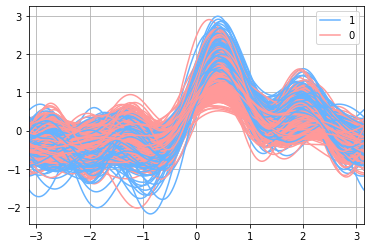

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
ddf= pd.DataFrame(all_inputs)
ddf['class']= all_labels
pd.plotting.andrews_curves(ddf, 'class', color=['#66b3ff','#ff9999'])

In [ ]:
print('Percentage of dropped data=', (786-336)/768)

Percentage of dropped data= 0.5859375


In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

LR, 0.7586822660098522, 0.06757423502486225))
LDA, 0.760344827586207, 0.0709357467840237))
KNN, 0.7148399014778325, 0.07720258097882188))
CART, 0.6910098522167488, 0.1072333432525435))
NB, 0.7378694581280787, 0.06748304948844087))
SVM, 0.7448891625615763, 0.07311815520506919))
XGB, 0.7396551724137931, 0.06843834404322033))


## **2.**  Impute Missing Values (Mean Value Filling)


In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_2 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

LR, 0.7586822660098522, 0.06757423502486225))
LDA, 0.760344827586207, 0.0709357467840237))
KNN, 0.7148399014778325, 0.07720258097882188))
CART, 0.6855295566502463, 0.10543430996883871))
NB, 0.7378694581280787, 0.06748304948844087))
SVM, 0.7448891625615763, 0.07311815520506919))
XGB, 0.7396551724137931, 0.06843834404322033))


## **3.**  Impute Missing Values (Median Value Filling)


In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

In [ ]:
df.fillna(df.median(), inplace=True)


In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_3 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

LR, 0.7604064039408868, 0.06710915901147871))
LDA, 0.7586822660098522, 0.06763817114170229))
KNN, 0.7077586206896552, 0.08647135719436552))
CART, 0.6979064039408868, 0.10696442023856127))
NB, 0.7395320197044335, 0.06601548115842465))
SVM, 0.746551724137931, 0.0708899772278356))
XGB, 0.7378694581280788, 0.06867381461272612))


## **4.**  Using back Filling


In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

In [ ]:
df.fillna(method= 'backfill' , inplace=True)
df.isnull().sum().sum()

2

In [ ]:
df.fillna(df.median(), inplace=True)
df.isnull().sum().sum()

0

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_4 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

LR, 0.7569581280788178, 0.07062813250241687))
LDA, 0.7586206896551725, 0.07137440616577483))
KNN, 0.720320197044335, 0.076164649114014))
CART, 0.6718596059113301, 0.07143969146497238))
NB, 0.7325738916256157, 0.07821629654278471))
SVM, 0.7360221674876848, 0.06471821346062034))
XGB, 0.7535098522167488, 0.06894272472589294))


## **5.**  Using forward Filling


In [8]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

In [9]:
df.fillna(method= 'ffill' , inplace=True)
df.isnull().sum().sum()

3

In [10]:
df.fillna(df.median(), inplace=True)
df.isnull().sum().sum()

0

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_5 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

LR, 0.7655788177339902, 0.06727934631579317))
LDA, 0.763793103448276, 0.07485071328993229))
KNN, 0.6995689655172413, 0.07472891283825316))
CART, 0.6908251231527094, 0.08232689536980195))
NB, 0.7360837438423645, 0.08130140431185919))
SVM, 0.7602216748768471, 0.0758215737033381))
XGB, 0.7552339901477833, 0.05853430915786824))


## Classification Comparison of Fill NaN Methods

In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [ ]:
names

['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM', 'XGB']

In [ ]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd


In [ ]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [ ]:
values= ['Acc', 'SD']

In [ ]:
Fill_NaN_Methods=['1_Remove', '2_Mean_fill','3_Median_fill',
     '4_Back_fill', '5_Forwd_fill']

In [ ]:
idx = pd.MultiIndex.from_product([Fill_NaN_Methods, values],
                                 names=['Fill_NaN_Methods', 'values'])

classification_comparison.columns = idx
classification_comparison

Fill_NaN_Methods 1_Remove      2_Mean_fill  ... 4_Back_fill 5_Forwd_fill     
values                Acc   SD         Acc  ...          SD          Acc   SD
LR                   0.76 0.07        0.76  ...        0.07         0.77 0.07
LDA                  0.76 0.07        0.76  ...        0.07         0.76 0.08
KNN                  0.71 0.08        0.71  ...        0.08         0.70 0.08
CART                 0.69 0.11        0.69  ...        0.07         0.69 0.08
NB                   0.74 0.07        0.74  ...        0.08         0.74 0.08
SVM                  0.74 0.07        0.74  ...        0.07         0.76 0.08
XGB                  0.74 0.07        0.74  ...        0.07         0.76 0.06

[7 rows x 10 columns]

In [ ]:
classification_comparison.to_csv('Classification Comparison of Fill_NaN_Methods.csv', index= False)

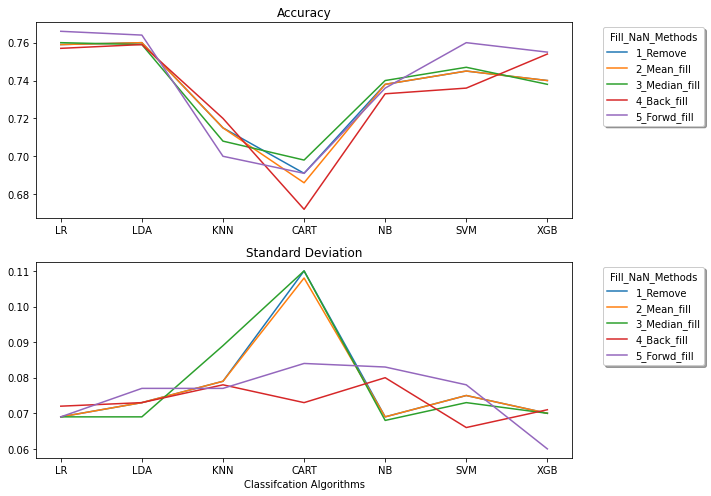

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='Fill_NaN_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='Fill_NaN_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
classification_comparison= classification_comparison.drop('1_Remove', axis=1, level=0)

In [ ]:
classification_comparison.T.max()

LR     0.77
LDA    0.76
KNN    0.72
CART   0.70
NB     0.74
SVM    0.76
XGB    0.76
dtype: float64

In [ ]:
classification_comparison.T['LDA']

Fill_NaN_Methods  values
2_Mean_fill       Acc      0.76
                  SD       0.07
3_Median_fill     Acc      0.76
                  SD       0.07
4_Back_fill       Acc      0.76
                  SD       0.07
5_Forwd_fill      Acc      0.76
                  SD       0.08
Name: LDA, dtype: float64

In [ ]:
classification_comparison.T['LR']

Fill_NaN_Methods  values
2_Mean_fill       Acc      0.76
                  SD       0.07
3_Median_fill     Acc      0.76
                  SD       0.07
4_Back_fill       Acc      0.76
                  SD       0.07
5_Forwd_fill      Acc      0.77
                  SD       0.07
Name: LR, dtype: float64

## Selected Fill NaN Methods

The most accurate Fill NaN Method is dropping Nan **but** we lost 56 % of data. that is meant 56 % of tests will fail. so it can't be selected.
The best fill NaN method is **Forwd_fill**

In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

In [ ]:
df.fillna(method= 'ffill' , inplace=True)
df.isnull().sum().sum()

3

In [ ]:
df.fillna(df.median(), inplace=True)
df.isnull().sum().sum()

0

# Add features

## **1.** Add features based on BMI classification table


**BMI classification table**  
- BMI		CLASSIFICATION
- < 30		:Obese
- 25-30		:Overweight
- 20-25		:Healthy weight range
- 20-18		:Underweight
- <18		  :Very Underweight


In [10]:
Obese= []
for i in df['BMI']:
  Obese.append(1 if i>30 else 0)
pd.value_counts(Obese)

1    474
0    294
dtype: int64

In [11]:
df['Obese']= Obese

In [12]:
Overweight= []
for i in df['BMI']:
  Overweight.append(1 if 30>i>25 else 0)
pd.value_counts(Overweight)

0    594
1    174
dtype: int64

In [13]:
df['Overweight']= Overweight

In [14]:
Healthy_weight= []
for i in df['BMI']:
  Healthy_weight.append(1 if 25>i>20 else 0)
pd.value_counts(Healthy_weight)

0    675
1     93
dtype: int64

In [15]:
df['Healthy_weight']= Healthy_weight

In [16]:
Underweight= []
for i in df['BMI']:
  Underweight.append(1 if 20>i>18 else 0)
pd.value_counts(Underweight)

0    755
1     13
dtype: int64

In [17]:
df['Underweight']= Underweight

In [18]:
Very_Underweight= []
for i in df['BMI']:
  Very_Underweight.append(1 if i<18 else 0)
pd.value_counts(Very_Underweight)

0    768
dtype: int64

In [19]:
#df['Very_Underweight']= Very_Underweight

## **2.** Add features based on 2-Hour serum insulin


**2-Hour serum insulin classification table**  
- insulin		CLASSIFICATION
- **>**140		:Normal
- 140-199		:pre-diabetic
- < 199		:diabetic

In [20]:
Normal= []
for i in df['insu']:
  Normal.append(1 if i<140 else 0)
pd.value_counts(Normal)

1    422
0    346
dtype: int64

In [21]:
df['Normal']= Normal

In [22]:
pre_diabetic= []
for i in df['insu']:
  pre_diabetic.append(1 if 199>i>140 else 0)
pd.value_counts(pre_diabetic)

0    624
1    144
dtype: int64

In [23]:
df['pre_diabetic']= pre_diabetic

In [24]:
diabetic= []
for i in df['insu']:
  diabetic.append(1 if i>199 else 0)
pd.value_counts(diabetic)

0    584
1    184
dtype: int64

In [25]:
df['diabetic']= diabetic

## **3.** Add features based on Plasma glucose 2-Hour in an oral glucose tolerance test


**2-Hour serum insulin classification table**  
- insulin		CLASSIFICATION
- **>**100		:Normal
- 100-125		:pre_diabetic
- < 125		:diabetic

In [26]:
Normal_p= []
for i in df['plas']:
  Normal_p.append(1 if i<100 else 0)
pd.value_counts(Normal_p)

0    572
1    196
dtype: int64

In [27]:
df['Normal_p']= Normal_p

In [28]:
pre_diabetic_p= []
for i in df['plas']:
  pre_diabetic_p.append(1 if 125>i>100 else 0)
pd.value_counts(pre_diabetic_p)

0    524
1    244
dtype: int64

In [29]:
df['pre_diabetic_p']= pre_diabetic_p

In [30]:
diabetic_p= []
for i in df['plas']:
  diabetic_p.append(1 if i>125 else 0)
pd.value_counts(diabetic_p)

0    471
1    297
dtype: int64

In [31]:
df['diabetic_p']= diabetic_p

In [32]:
df= df[['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age',
        'Obese', 'Overweight', 'Healthy_weight', 'Underweight',
        'Normal', 'pre_diabetic', 'diabetic', 'Normal_p',
       'pre_diabetic_p', 'diabetic_p', 'class']]

In [33]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 18)

# Automatic Outlier Detection Algorithms Comparison

## **1.** DBSCAN


In [13]:
from sklearn.cluster import DBSCAN
def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']


In [14]:
outlier_index1=[]
for col in df.columns[0:-1]:
  clusters=remove_outliers_DBSCAN((df[col]), 0.1, 2)
  df_cluster=pd.DataFrame(clusters)
  outlier_index1= outlier_index1+(list(df_cluster.index[df_cluster['cluster']==-1]))
outlier_index1=list(set(outlier_index1))
print(len(outlier_index1))

DBSCAN_df=df.drop(outlier_index1)
#DBSCAN_df.to_csv('DBSCAN_df.csv', index= False)
#!mkdir Outlier_Detection_DFs
#!mv DBSCAN_df.csv Outlier_Detection_DFs/

all_inputs = DBSCAN_df[DBSCAN_df.columns[0:-1]].values
all_labels = DBSCAN_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

117
LR, 0.7904166666666667, 0.08653335098869877))
LDA, 0.7884166666666667, 0.08488632104173205))
KNN, 0.7516666666666667, 0.08200948454633497))
CART, 0.7065833333333333, 0.08800327487593225))
NB, 0.7657500000000002, 0.09038109899506398))
SVM, 0.77175, 0.08652628855504615))
XGB, 0.7845, 0.10416479998327438))


## **2.** Isolation Forest

In [ ]:
to_model_columns=df.columns[0:-1]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto',
                    contamination=0.0976, \
                        max_features=1.0 , bootstrap=False, n_jobs=-1,
                     random_state=42, verbose=0 )
clf.fit(df[to_model_columns])
pred = clf.predict(df[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index2=list(outliers.index)
print(outlier_index2)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())
df.drop('anomaly', axis='columns', inplace=True)
Isolation_Forest_df=df.drop(outlier_index2)
Isolation_Forest_df['class'].value_counts()
#Isolation_Forest_df.to_csv('Isolation_Forest_df.csv', index= False)
#!mv Isolation_Forest_df.csv Outlier_Detection_DFs/
all_inputs = Isolation_Forest_df[Isolation_Forest_df.columns[0:-1]].values
all_labels = Isolation_Forest_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_2 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

[4, 12, 13, 33, 35, 50, 55, 62, 68, 75, 80, 81, 90, 102, 106, 125, 129, 140, 146, 151, 190, 196, 222, 228, 239, 243, 245, 254, 258, 279, 294, 299, 310, 316, 319, 330, 362, 370, 382, 392, 395, 408, 416, 418, 438, 445, 453, 489, 498, 512, 519, 526, 529, 537, 542, 571, 582, 584, 585, 587, 589, 596, 607, 621, 634, 639, 646, 673, 674, 676, 679, 690, 717, 734, 749]
 1    693
-1     75
Name: anomaly, dtype: int64
LR, 0.7783076923076924, 0.059909003976000554))
LDA, 0.7802307692307692, 0.06378268392934536))
KNN, 0.7283076923076923, 0.08382342670104419))
CART, 0.7013076923076922, 0.07975891929496409))
NB, 0.7263846153846154, 0.0917525292687833))
SVM, 0.7706923076923077, 0.07930388709814758))
XGB, 0.7416153846153846, 0.09019174183847425))


## **3.** Minimum Covariance Determinant

In [ ]:
to_model_columns=df.columns[:-1]
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.1)
ee.fit(df[to_model_columns])
pred = ee.predict(df[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index3=list(outliers.index)
print(outlier_index3)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())
df.drop('anomaly', axis='columns', inplace=True)
Minimum_Covariance_Determinant_df=df.drop(outlier_index3)
Minimum_Covariance_Determinant_df['class'].value_counts()
#Minimum_Covariance_Determinant_df.to_csv('Minimum_Covariance_Determinant_df.csv', index= False)
#!mv Minimum_Covariance_Determinant_df.csv Outlier_Detection_DFs/
all_inputs = Minimum_Covariance_Determinant_df[Minimum_Covariance_Determinant_df.columns[0:-1]].values
all_labels = Minimum_Covariance_Determinant_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_3 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

[4, 8, 9, 10, 11, 12, 13, 15, 27, 33, 45, 50, 58, 62, 68, 72, 79, 90, 102, 106, 107, 125, 135, 154, 155, 177, 186, 217, 220, 221, 222, 228, 239, 245, 247, 261, 286, 294, 316, 319, 369, 370, 381, 409, 410, 416, 418, 432, 438, 445, 453, 468, 469, 473, 475, 509, 519, 520, 526, 537, 579, 581, 584, 585, 586, 587, 591, 592, 607, 639, 655, 673, 697, 744, 745, 753, 754]
 1    691
-1     77
Name: anomaly, dtype: int64
LR, 0.7798461538461539, 0.079176082695508))
LDA, 0.7835384615384614, 0.07819729258770625))
KNN, 0.7374615384615385, 0.059196343642084155))
CART, 0.706153846153846, 0.08582216372815503))
NB, 0.7334615384615385, 0.08009000114885545))
SVM, 0.7838461538461537, 0.08061376980179506))
XGB, 0.7413076923076922, 0.07699731033494982))


## **4.** Local Outlier Factor

In [ ]:
to_model_columns=df.columns[0:-1]
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(novelty=True, n_jobs=1,
                         n_neighbors=50, contamination=0.16)
lof.fit(df[to_model_columns])
pred = lof.predict(df[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index4=list(outliers.index)
print(outlier_index4)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())
df.drop('anomaly', axis='columns', inplace=True)
Local_Outlier_Factor_df=df.drop(outlier_index4)
Local_Outlier_Factor_df['class'].value_counts()
#Local_Outlier_Factor_df.to_csv('Local_Outlier_Factor_df.csv', index= False)
#!mv Local_Outlier_Factor_df.csv Outlier_Detection_DFs/
all_inputs = Local_Outlier_Factor_df[Local_Outlier_Factor_df.columns[0:-1]].values
all_labels = Local_Outlier_Factor_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_4 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

[8, 9, 10, 11, 12, 13, 18, 22, 40, 43, 55, 57, 62, 76, 81, 84, 93, 106, 108, 111, 120, 125, 146, 153, 154, 155, 177, 182, 184, 185, 186, 209, 211, 212, 220, 221, 222, 227, 228, 231, 235, 247, 249, 250, 251, 258, 260, 273, 274, 286, 294, 303, 304, 317, 319, 323, 332, 346, 352, 355, 362, 370, 392, 399, 409, 410, 415, 416, 417, 418, 435, 440, 445, 453, 456, 459, 486, 489, 498, 506, 509, 537, 549, 552, 575, 579, 584, 585, 586, 587, 589, 596, 597, 598, 617, 618, 619, 645, 647, 655, 661, 672, 680, 681, 691, 695, 710, 711, 712, 715, 737, 753, 754, 759, 760, 761, 762]
 1    651
-1    117
Name: anomaly, dtype: int64
LR, 0.7604166666666666, 0.09281982995746832))
LDA, 0.7625, 0.08317735402272797))
KNN, 0.7394166666666667, 0.07461247103087615))
CART, 0.7105000000000001, 0.07471073848145555))
NB, 0.5086666666666667, 0.10690026504488502))
SVM, 0.7723333333333332, 0.08287272705111669))
XGB, 0.7356666666666667, 0.08967286223948817))


## **5.** One-Class SVM

In [ ]:
to_model_columns=df.columns[0:-1]
from sklearn.svm import OneClassSVM

ocs = OneClassSVM(nu=0.15)
ocs.fit(df[to_model_columns])
pred = ocs.predict(df[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index5=list(outliers.index)
print(outlier_index5)

#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())
df.drop('anomaly', axis='columns', inplace=True)
One_Class_SVM_df=df.drop(outlier_index5)
One_Class_SVM_df['class'].value_counts()

#One_Class_SVM_df.to_csv('One_Class_SVM_df.csv', index= False)
#!mv One_Class_SVM_df.csv Outlier_Detection_DFs/

all_inputs = One_Class_SVM_df[One_Class_SVM_df.columns[0:-1]].values
all_labels = One_Class_SVM_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_5 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

[8, 9, 10, 11, 12, 13, 22, 43, 47, 51, 52, 53, 55, 56, 62, 74, 75, 76, 81, 103, 108, 111, 113, 146, 153, 154, 155, 173, 182, 183, 184, 185, 186, 206, 220, 221, 222, 225, 227, 228, 231, 232, 234, 235, 247, 248, 249, 250, 251, 254, 258, 273, 286, 290, 302, 317, 319, 323, 332, 352, 355, 359, 360, 362, 370, 392, 409, 410, 415, 416, 417, 418, 425, 440, 445, 461, 462, 466, 486, 489, 519, 537, 549, 561, 566, 579, 584, 585, 586, 587, 597, 598, 606, 617, 618, 619, 645, 655, 661, 672, 674, 675, 680, 681, 695, 707, 710, 711, 712, 715, 753, 754, 759, 760, 761, 762]
 1    652
-1    116
Name: anomaly, dtype: int64
LR, 0.7605833333333334, 0.08276686635765948))
LDA, 0.7688333333333334, 0.07660341593775916))
KNN, 0.75425, 0.0815619651962032))
CART, 0.71375, 0.10100587854179577))
NB, 0.5199166666666667, 0.10665947241363778))
SVM, 0.7686666666666666, 0.08800505036012927))
XGB, 0.7733333333333333, 0.07991488527733046))


## Comparison 

In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [ ]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_1']= df_mean
classification_comparison['sd_1']= df_sd


In [ ]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [ ]:
classification_comparison

,Accuracy_1,sd_1,Accuracy_2,sd_2,Accuracy_3,sd_3,Accuracy_4,sd_4,Accuracy_5,sd_5
LR,0.79,0.09,0.78,0.06,0.78,0.08,0.76,0.10,0.76,0.09
LDA,0.79,0.09,0.78,0.07,0.78,0.08,0.76,0.09,0.77,0.08
KNN,0.75,0.07,0.73,0.09,0.74,0.06,0.74,0.08,0.75,0.08
CART,0.70,0.09,0.70,0.08,0.71,0.09,0.71,0.08,0.71,0.10
NB,0.47,0.09,0.73,0.09,0.73,0.08,0.51,0.11,0.52,0.11
SVM,0.78,0.09,0.77,0.08,0.78,0.08,0.77,0.09,0.77,0.09
XGB,0.79,0.11,0.74,0.09,0.74,0.08,0.74,0.09,0.77,0.08


In [ ]:
values= ['Acc', 'SD']

In [ ]:
DFs=[ '1_DBSCAN_df', '2_IF_df', '3_MCD_df', '4_LOF_df','5_OCSVM_df']

In [ ]:
idx = pd.MultiIndex.from_product([DFs, values],
                                 names=['DFs', 'values'])

classification_comparison.columns = idx
classification_comparison

DFs    1_DBSCAN_df      2_IF_df       ... 4_LOF_df      5_OCSVM_df     
values         Acc   SD     Acc   SD  ...      Acc   SD        Acc   SD
LR            0.79 0.09    0.78 0.06  ...     0.76 0.10       0.76 0.09
LDA           0.79 0.09    0.78 0.07  ...     0.76 0.09       0.77 0.08
KNN           0.75 0.07    0.73 0.09  ...     0.74 0.08       0.75 0.08
CART          0.70 0.09    0.70 0.08  ...     0.71 0.08       0.71 0.10
NB            0.47 0.09    0.73 0.09  ...     0.51 0.11       0.52 0.11
SVM           0.78 0.09    0.77 0.08  ...     0.77 0.09       0.77 0.09
XGB           0.79 0.11    0.74 0.09  ...     0.74 0.09       0.77 0.08

[7 rows x 10 columns]

In [ ]:
#classification_comparison.to_csv('classification_comparison.csv', index= False)

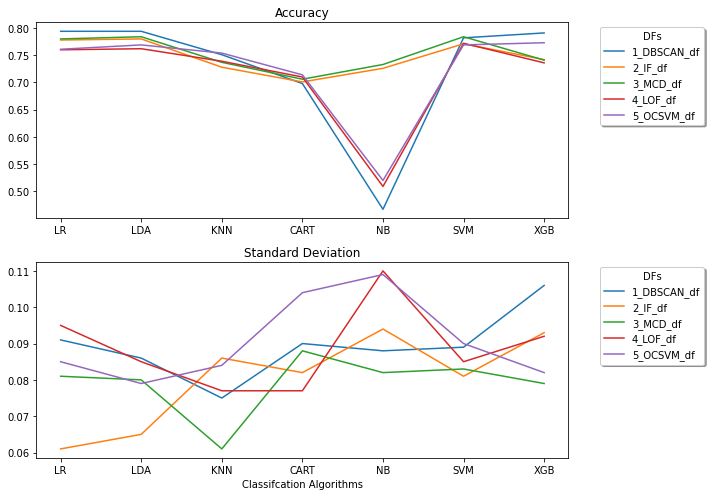

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='DFs', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='DFs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
classification_comparison.T.max()

LR     0.79
LDA    0.79
KNN    0.75
CART   0.71
NB     0.73
SVM    0.78
XGB    0.79
dtype: float64

In [ ]:
classification_comparison.T['LR']

DFs          values
1_DBSCAN_df  Acc      0.79
             SD       0.09
2_IF_df      Acc      0.78
             SD       0.06
3_MCD_df     Acc      0.78
             SD       0.08
4_LOF_df     Acc      0.76
             SD       0.10
5_OCSVM_df   Acc      0.76
             SD       0.09
Name: LR, dtype: float64

In [ ]:
classification_comparison.T['LDA']

DFs          values
1_DBSCAN_df  Acc      0.79
             SD       0.09
2_IF_df      Acc      0.78
             SD       0.07
3_MCD_df     Acc      0.78
             SD       0.08
4_LOF_df     Acc      0.76
             SD       0.09
5_OCSVM_df   Acc      0.77
             SD       0.08
Name: LDA, dtype: float64

In [ ]:
classification_comparison.T.max()

LR     0.79
LDA    0.79
KNN    0.75
CART   0.71
NB     0.73
SVM    0.78
XGB    0.79
dtype: float64

## Selected Outlier Algorithm DF  

In [15]:
df= DBSCAN_df

In [ ]:
df

,No_preg,plas,pres_mm,skin_mm,insu,BMI,DPF,age,Obese,Overweight,Healthy_weight,Underweight,Normal,pre_diabetic,diabetic,Normal_p,pre_diabetic_p,diabetic_p,class
0,6,148.00,72.00,35.00,130.00,33.60,0.63,50,1,0,0,0,1,0,0,0,0,1,1
1,1,85.00,66.00,29.00,130.00,26.60,0.35,31,0,1,0,0,1,0,0,1,0,0,0
2,8,183.00,64.00,29.00,130.00,23.30,0.67,32,0,0,1,0,1,0,0,0,0,1,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,1,0,0,1,0,0,1,0,0,0
5,5,116.00,74.00,35.00,168.00,25.60,0.20,30,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.00,76.00,48.00,180.00,32.90,0.17,63,1,0,0,0,0,1,0,0,1,0,0
764,2,122.00,70.00,27.00,180.00,36.80,0.34,27,1,0,0,0,0,1,0,0,1,0,0
765,5,121.00,72.00,23.00,112.00,26.20,0.24,30,0,1,0,0,1,0,0,0,1,0,0
766,1,126.00,60.00,23.00,112.00,30.10,0.35,47,1,0,0,0,1,0,0,0,0,1,1


# Feature Selection Methods Comparison

## **1.** Removing features with low variance

**VarianceThreshold** is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.*italicised text*

In [ ]:
df.var()

No_preg             11.13
plas               807.43
pres_mm            133.84
skin_mm            102.21
insu             10765.78
BMI                 37.09
DPF                  0.09
age                128.90
Obese                0.24
Overweight           0.19
Healthy_weight       0.11
Underweight          0.01
Normal               0.25
pre_diabetic         0.16
diabetic             0.17
Normal_p             0.19
pre_diabetic_p       0.23
diabetic_p           0.23
class                0.22
dtype: float64

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
print(all_inputs.shape)

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=.01)
all_inputs = sel.fit_transform(all_inputs)
print(all_inputs.shape)
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

(651, 18)
(651, 17)
LR, 0.7584166666666666, 0.08285609177631084))
LDA, 0.7541666666666668, 0.06583333333333333))
KNN, 0.7195, 0.06828473881882799))
CART, 0.6678333333333333, 0.08876326191993322))
NB, 0.7113333333333334, 0.08660510634162658))
SVM, 0.7525, 0.07366685520337865))
XGB, 0.7258333333333333, 0.08015176576692215))


Univariate Feature Selection

## **2.** UFS SelectKBest Select K Best
it removes all but the highest scoring features

In [ ]:
all_inputs = df[df.columns[0:-1]].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values
print(all_inputs.shape)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

all_inputs = SelectKBest(chi2, k=2).fit_transform(all_inputs, all_labels)
print(all_inputs.shape)
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_2 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

(651, 18)
(651, 2)
LR, 0.7173333333333334, 0.0709271927166631))
LDA, 0.7173333333333334, 0.0709271927166631))
KNN, 0.51875, 0.11454484201976681))
CART, 0.7173333333333334, 0.0709271927166631))
NB, 0.7173333333333334, 0.0709271927166631))
SVM, 0.7173333333333334, 0.0709271927166631))
XGB, 0.7173333333333334, 0.0709271927166631))


## **3.** `UFS `SelectFpr` False Positive Rate test.
Filter: Select the p values below alpha based on a FPR test. a smaller p-value bears more significance as it can tell you that the hypothesis may not explain the observation fairly. If one or more of these probabilities turn out to be less than or equal to α, the level of significance, we reject the null hypothesis. For a true null hypothesis, p can take on any value between 0 and 1 with equal likeliness. For a true alternative hypothesis, p-values likely fall closer to 0.

In [ ]:
all_inputs = df[df.columns[0:-1]].values
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values
from sklearn.feature_selection import SelectFpr, chi2
all_inputs = SelectFpr(chi2, alpha= 0.09
                       ).fit_transform(all_inputs, all_labels)
print(all_inputs.shape)
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_3 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

(651, 14)
LR, 0.7726666666666666, 0.06652568426304735))
LDA, 0.7582499999999999, 0.06819187594167243))
KNN, 0.7411666666666668, 0.07913964451103717))
CART, 0.6453333333333334, 0.11150435965567546))
NB, 0.71325, 0.09703160281292093))
SVM, 0.7523333333333333, 0.058980693639717585))
XGB, 0.7158333333333334, 0.0702228595259407))


## **4.** Feature selection using SelectFromModel
### L1-based feature selection
Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the Lasso for regression, and of LogisticRegression and LinearSVC for classification:

In [ ]:
all_inputs = df[df.columns[0:-1]].values
sc = StandardScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=.1, penalty="l1", dual=False).fit(all_inputs, all_labels)
model = SelectFromModel(lsvc, prefit=True)
all_inputs = model.transform(all_inputs)
print(all_inputs.shape)

from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_4 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

(651, 14)
LR, 0.7625, 0.07383258088405144))
LDA, 0.7584166666666667, 0.06778330464715399))
KNN, 0.7110833333333335, 0.07398249605293283))
CART, 0.6778333333333333, 0.08331516468606821))
NB, 0.7153333333333334, 0.07775424247089172))
SVM, 0.7603333333333333, 0.07271252375699189))
XGB, 0.7300833333333334, 0.06684242456869906))


## **5.** Sequential Feature Selection 
(Selecting features based on importance)
The features with the highest absolute coef_ value are considered the most important. 

In [ ]:
all_inputs = df[df.columns[0:-1]].values
sc = StandardScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values
all_inputs.shape

(651, 18)

Feature importance from coefficients

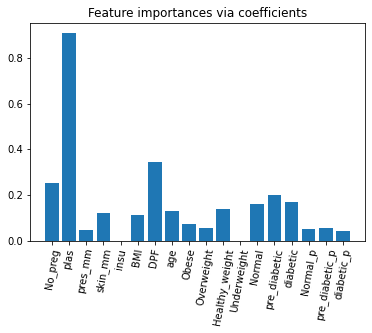

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)

lasso = LassoCV().fit(all_inputs, all_labels)
importance = np.abs(lasso.coef_)
feature_names = np.array(all_labels)
plt.bar(height=importance, x=df.columns[0:-1])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
np.sort(importance)

array([0.        , 0.        , 0.04306728, 0.04716527, 0.04871053,
       0.05710284, 0.05715265, 0.07402179, 0.11024182, 0.120036  ,
       0.13149931, 0.13837032, 0.16103478, 0.17023674, 0.19933122,
       0.25381055, 0.34194571, 0.90651641])

In [ ]:
importance = [i for i in importance if i != 0]
len(importance)

16

In [ ]:
all_inputs = df[df.columns[0:-1]].values
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values
print(all_inputs.shape)

from sklearn.feature_selection import SelectFromModel

threshold = np.sort(importance)[-12] 

sfm = SelectFromModel(lasso, threshold=threshold).fit(all_inputs, all_labels)
selected_Features = df.columns[:-1][sfm.get_support()]
print("Features selected by SelectFromModel: ",
      f"{df.columns[0:-1][sfm.get_support()]}")


all_inputs = df[selected_Features].values
all_labels = df['class'].values
print(all_inputs.shape)
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_5 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

(651, 18)
Features selected by SelectFromModel:  Index(['No_preg', 'plas', 'skin_mm', 'BMI', 'DPF', 'age', 'Obese',
       'Overweight', 'Healthy_weight', 'Normal', 'pre_diabetic', 'diabetic'],
      dtype='object')
(651, 12)
LR, 0.7686666666666666, 0.07205437761394745))
LDA, 0.7584166666666667, 0.07235037241707114))
KNN, 0.7220833333333334, 0.07903739445491749))
CART, 0.6774166666666666, 0.10026419960395747))
NB, 0.703, 0.0834276133343551))
SVM, 0.7627500000000002, 0.05687528998705071))
XGB, 0.7301666666666667, 0.07135572078599509))


##  **6.** Principal Component Analysis

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(651, 18)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 13)
pca.fit(all_inputs)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_)

[1.08251911e+04 7.77384340e+02 1.62506245e+02 1.02203066e+02
 8.62756889e+01 2.61316555e+01 7.38839863e+00 3.26410860e-01
 2.49744340e-01 2.17934025e-01 9.78183797e-02 8.57295189e-02
 7.69752012e-02]


In [ ]:
all_inputs = pca.transform(all_inputs)
all_inputs.shape

(651, 13)

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_6 = []
names = []
seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_6 = cross_val_score(model, X_train, y_train, cv=kfold,          scoring='accuracy')
    results_6.append(cv_results_6)
    names.append(name)
    print(f"{name}, {cv_results_6.mean()}, {cv_results_6.std()}))")

LR, 0.7563333333333333, 0.0772542699287374))
LDA, 0.7582500000000001, 0.06468186032849979))
KNN, 0.7252500000000001, 0.07501532250887888))
CART, 0.6740833333333334, 0.07876031678453306))
NB, 0.7417499999999999, 0.08756660163682396))
SVM, 0.75425, 0.06729180856538186))
XGB, 0.7455, 0.09419262179173059))


## Classification Comparison of Feature Selection Methods

In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [ ]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd


In [ ]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_6)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_6']= df_mean
classification_comparison['sd_6']= df_sd

In [ ]:
values= ['Acc', 'SD']

In [ ]:
FS_Methods=['1_RFLVar', '2_UFSKBest','3_UFSFpr',
     '4_FSU', '5_SFS', '6_PCA']

In [ ]:
idx = pd.MultiIndex.from_product([FS_Methods, values],
                                 names=['FS_Methods', 'values'])

classification_comparison.columns = idx
classification_comparison

FS_Methods 1_RFLVar      2_UFSKBest      3_UFSFpr  ... 4_FSU 5_SFS      6_PCA     
values          Acc   SD        Acc   SD      Acc  ...    SD   Acc   SD   Acc   SD
LR             0.76 0.09       0.72 0.07     0.77  ...  0.08  0.77 0.07  0.76 0.08
LDA            0.75 0.07       0.72 0.07     0.76  ...  0.07  0.76 0.07  0.76 0.07
KNN            0.72 0.07       0.52 0.12     0.74  ...  0.08  0.72 0.08  0.73 0.08
CART           0.67 0.09       0.72 0.07     0.65  ...  0.09  0.68 0.10  0.67 0.08
NB             0.71 0.09       0.72 0.07     0.71  ...  0.08  0.70 0.09  0.74 0.09
SVM            0.75 0.08       0.72 0.07     0.75  ...  0.07  0.76 0.06  0.75 0.07
XGB            0.73 0.08       0.72 0.07     0.72  ...  0.07  0.73 0.07  0.75 0.10

[7 rows x 12 columns]

In [ ]:
classification_comparison.to_csv('Classification Comparison of Feature Selection Methods.csv', index= False)

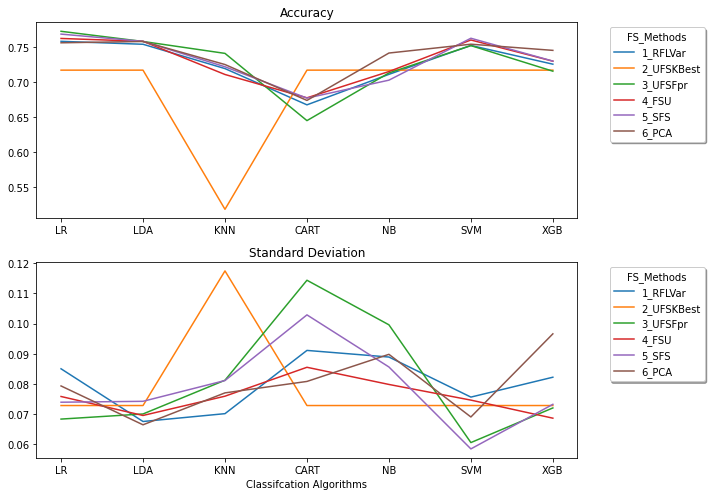

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
classification_comparison.T.max()

LR     0.77
LDA    0.76
KNN    0.74
CART   0.72
NB     0.74
SVM    0.76
XGB    0.75
dtype: float64

In [ ]:
classification_comparison.T['LDA']

FS_Methods  values
1_RFLVar    Acc      0.75
            SD       0.07
2_UFSKBest  Acc      0.72
            SD       0.07
3_UFSFpr    Acc      0.76
            SD       0.07
4_FSU       Acc      0.76
            SD       0.07
5_SFS       Acc      0.76
            SD       0.07
6_PCA       Acc      0.76
            SD       0.07
Name: LDA, dtype: float64

In [ ]:
classification_comparison.T['XGB']

FS_Methods  values
1_RFLVar    Acc      0.73
            SD       0.08
2_UFSKBest  Acc      0.72
            SD       0.07
3_UFSFpr    Acc      0.72
            SD       0.07
4_FSU       Acc      0.73
            SD       0.07
5_SFS       Acc      0.73
            SD       0.07
6_PCA       Acc      0.75
            SD       0.10
Name: XGB, dtype: float64

The max accuracy was by using Sequential Feature Selection

##  Selected Feature

In [ ]:
df=df[(list(selected_Features) + ['class'])]
df['class'].value_counts()

0    436
1    215
Name: class, dtype: int64

In [ ]:
df.to_csv('New_df.csv', index= False)

In [ ]:
!mv New_df.csv data/

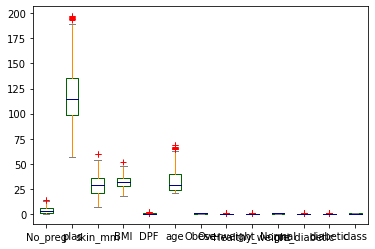

In [ ]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df.plot(kind='box', color=color, sym='r+')

# Step 4: imbalanced Correction Methods

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(df['class'])

0    436
1    215
Name: class, dtype: int64

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(all_labels), all_labels)
print(class_weights)

[0.74655963 1.51395349]


In [ ]:
df.shape

(651, 19)

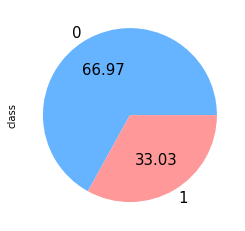

In [ ]:
pd.value_counts(df['class']).plot(kind='pie', autopct='%.2f',fontsize=15, colors= ['#66b3ff','#ff9999'])

## **1.** SMOTE

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(df['class'])

0    436
1    215
Name: class, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

1    436
0    436
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

LR, 0.7751420454545455, 0.08455303325143962))
LDA, 0.7643939393939394, 0.09082007163027046))
KNN, 0.7843276515151516, 0.07034644879847995))
CART, 0.7614109848484849, 0.06805443369174748))
NB, 0.6898674242424242, 0.08396182805515087))
SVM, 0.7889204545454545, 0.07043118554169736))
XGB, 0.8208333333333334, 0.09113352189579482))


## **2.** Border line SMOTE

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(df['class'])

0    436
1    215
Name: class, dtype: int64

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    436
0    436
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_2 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

LR, 0.7276515151515152, 0.0901957691547446))
LDA, 0.718560606060606, 0.08409954654657088))
KNN, 0.7888257575757576, 0.07068480213909865))
CART, 0.7355113636363637, 0.10053103626904847))
NB, 0.6269412878787879, 0.08789515168554167))
SVM, 0.7964488636363637, 0.0857044067321199))
XGB, 0.7932765151515151, 0.09200389345713479))


## **3.** SVM SMOTE

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    436
1    215
dtype: int64

In [ ]:
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

1    436
0    436
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_3 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

LR, 0.7505681818181819, 0.0732641268889288))
LDA, 0.7506155303030303, 0.06697846108818667))
KNN, 0.7982007575757576, 0.07539680907998988))
CART, 0.76875, 0.07587384543607918))
NB, 0.6224431818181817, 0.09316088433553571))
SVM, 0.7965435606060606, 0.09085939840960901))
XGB, 0.8085700757575758, 0.09008776861566418))


## **4.** Adaptive Synthetic Sampling (ADASYN)

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    436
1    215
dtype: int64

In [ ]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN(random_state=42)
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

0    436
1    410
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_4 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

LR, 0.7409274193548387, 0.06423989502562429))
LDA, 0.7266633064516129, 0.06441072775651249))
KNN, 0.7757056451612903, 0.05958121809612403))
CART, 0.7002016129032258, 0.06295473878125148))
NB, 0.5914314516129033, 0.08213474360019339))
SVM, 0.7930947580645161, 0.06087313832069237))
XGB, 0.7979334677419355, 0.04466701337961475))


## **5.** Random Over Sampler

In [38]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    436
1    215
dtype: int64

In [67]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    436
0    436
dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_5 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

LR, 0.7519886363636363, 0.0804087689173367))
LDA, 0.7368371212121212, 0.06112313455214268))
KNN, 0.7812973484848484, 0.07740889376250125))
CART, 0.8257575757575758, 0.06408403591629103))
NB, 0.6362215909090909, 0.09109104020091145))
SVM, 0.773532196969697, 0.08664761084194858))
XGB, 0.8194602272727274, 0.06482094040638976))


## **6.** Random Under Sampler

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    436
1    215
dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
all_inputs, all_labels = undersample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

1    215
0    215
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler( )
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_6 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_6 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_6.append(cv_results_6)
    names.append(name)
    print(f"{name}, {cv_results_6.mean()}, {cv_results_6.std()}))")

LR, 0.7141544117647058, 0.09933191488361819))
LDA, 0.7204044117647059, 0.0994244017703277))
KNN, 0.6641544117647059, 0.11677801149371232))
CART, 0.6648897058823529, 0.09150110464806754))
NB, 0.5716911764705882, 0.13200270244035572))
SVM, 0.7075367647058823, 0.10383979495775456))
XGB, 0.7207720588235295, 0.12170436551061986))


## **7.** Combining Random Oversampling and Undersampling

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    436
1    215
dtype: int64

In [ ]:
under = RandomUnderSampler(sampling_strategy=.7)
all_inputs, all_labels = under.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)


0    307
1    215
dtype: int64

In [ ]:
over = RandomOverSampler()
all_inputs, all_labels = over.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

1    307
0    307
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_7 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_7 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_7.append(cv_results_7)
    names.append(name)
    print(f"{name}, {cv_results_7.mean()}, {cv_results_7.std()}))")

LR, 0.7413043478260869, 0.0680195123789653))
LDA, 0.7326086956521738, 0.07439103753160294))
KNN, 0.7391304347826086, 0.07275304578557179))
CART, 0.7478260869565216, 0.07352841097951203))
NB, 0.5869565217391304, 0.1248817966638702))
SVM, 0.7869565217391304, 0.0800519679979216))
XGB, 0.8043478260869564, 0.04861017342390848))


## Classification Comparison of Feature Selection Methods

In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [ ]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd


In [ ]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_6)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_6']= df_mean
classification_comparison['sd_6']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_7)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_7']= df_mean
classification_comparison['sd_7']= df_sd

In [ ]:
values= ['Acc', 'SD']

In [ ]:
FS_Methods=['1_SMOTE', '2_BL-SMOTE','3_SVM-SMOTE',
     '4_ADASYN', '5_ROS', '6_RUS', '7_CR(O-U)S']

In [ ]:
idx = pd.MultiIndex.from_product([FS_Methods, values],
                                 names=['FS_Methods', 'values'])

classification_comparison.columns = idx
classification_comparison

FS_Methods 1_SMOTE      2_BL-SMOTE       ... 6_RUS      7_CR(O-U)S     
values         Acc   SD        Acc   SD  ...   Acc   SD        Acc   SD
LR            0.79 0.09       0.79 0.09  ...  0.71 0.10       0.74 0.07
LDA           0.79 0.09       0.79 0.09  ...  0.72 0.10       0.73 0.08
KNN           0.75 0.08       0.74 0.10  ...  0.66 0.12       0.74 0.07
CART          0.72 0.09       0.71 0.08  ...  0.66 0.09       0.75 0.08
NB            0.47 0.09       0.52 0.09  ...  0.57 0.14       0.59 0.13
SVM           0.78 0.09       0.77 0.08  ...  0.71 0.11       0.79 0.08
XGB           0.79 0.11       0.79 0.11  ...  0.72 0.12       0.80 0.05

[7 rows x 14 columns]

In [ ]:
classification_comparison.to_csv('Classification Comparison of Feature Selection Methods.csv', index= False)

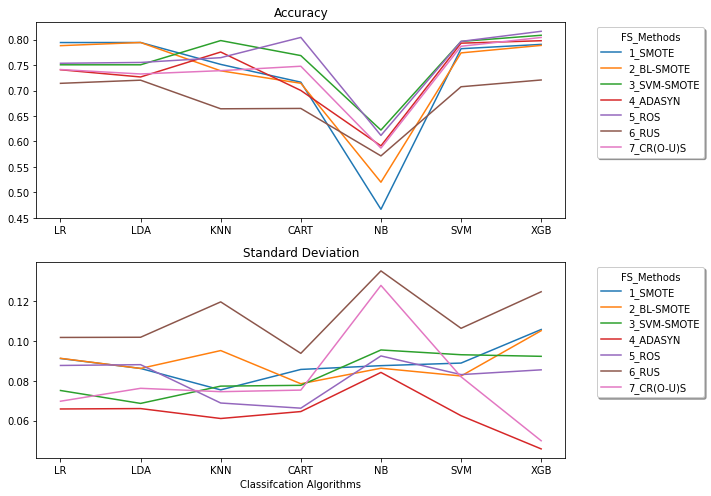

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
classification_comparison.T.max()

LR     0.79
LDA    0.79
KNN    0.80
CART   0.80
NB     0.62
SVM    0.80
XGB    0.82
dtype: float64

In [ ]:
classification_comparison.T['CART']

FS_Methods   values
1_SMOTE      Acc      0.72
             SD       0.09
2_BL-SMOTE   Acc      0.71
             SD       0.08
3_SVM-SMOTE  Acc      0.77
             SD       0.08
4_ADASYN     Acc      0.70
             SD       0.06
5_ROS        Acc      0.80
             SD       0.07
6_RUS        Acc      0.66
             SD       0.09
7_CR(O-U)S   Acc      0.75
             SD       0.08
Name: CART, dtype: float64

In [ ]:
classification_comparison.T['SVM']

FS_Methods   values
1_SMOTE      Acc      0.78
             SD       0.09
2_BL-SMOTE   Acc      0.77
             SD       0.08
3_SVM-SMOTE  Acc      0.80
             SD       0.09
4_ADASYN     Acc      0.79
             SD       0.06
5_ROS        Acc      0.80
             SD       0.08
6_RUS        Acc      0.71
             SD       0.11
7_CR(O-U)S   Acc      0.79
             SD       0.08
Name: SVM, dtype: float64

In [ ]:
classification_comparison.T['XGB']

FS_Methods   values
1_SMOTE      Acc      0.79
             SD       0.11
2_BL-SMOTE   Acc      0.79
             SD       0.11
3_SVM-SMOTE  Acc      0.81
             SD       0.09
4_ADASYN     Acc      0.80
             SD       0.05
5_ROS        Acc      0.82
             SD       0.09
6_RUS        Acc      0.72
             SD       0.12
7_CR(O-U)S   Acc      0.80
             SD       0.05
Name: XGB, dtype: float64

The max accuracy was by using Random Over Sampler

In [16]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values

In [17]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    436
0    436
dtype: int64

# Step 5:  Building the classifier

In [41]:

pd.value_counts(all_labels)

1    436
0    436
dtype: int64

## Using lazy predict

In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict 
from lazypredict.Supervised import LazyClassifier
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.1, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 30/30 [00:01<00:00, 18.55it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.89,0.89,0.89,0.89,0.17
ExtraTreeClassifier,0.89,0.88,0.88,0.88,0.01
LGBMClassifier,0.85,0.85,0.85,0.85,0.09
RandomForestClassifier,0.84,0.84,0.84,0.84,0.22
NuSVC,0.84,0.84,0.84,0.84,0.06
SVC,0.84,0.84,0.84,0.84,0.05
BaggingClassifier,0.83,0.83,0.83,0.83,0.06
KNeighborsClassifier,0.82,0.82,0.82,0.82,0.02
XGBClassifier,0.82,0.81,0.81,0.82,0.09


In [287]:
pd.value_counts(all_labels)

1    436
0    436
dtype: int64

## **1.** Extra Trees Classifier

### Confusion Matrix & Tuning

In [42]:
from sklearn.ensemble import ExtraTreesClassifier

In [193]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cls = ExtraTreesClassifier(n_estimators=20,
                           criterion= 'entropy',
                           min_samples_split=6,
                           max_samples= 55)
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.8944954128440367
--------------------------------------------------------
------- Confusion Matrix --------

[[ 86  17]
 [  6 109]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       103
           1       0.87      0.95      0.90       115

    accuracy                           0.89       218
   macro avg       0.90      0.89      0.89       218
weighted avg       0.90      0.89      0.89       218

--------------------------------------------------------


In [195]:
ETsC=[]
ETsC.append(0.8944954128440367)


### Preprocessing Methods Comparison


1.   Standard Scaler
2.   Min Max Scaler
3.   Max Abs Scaler
4. Robust Scaler
5. Power Transformer
6. Quantile Transformer (uniform output)
7. Quantile Transformer (Gaussian output)
8. Normalizer




In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
scalers = []
scalers.append(('1.SS', StandardScaler()))
scalers.append(('2.MMS', MinMaxScaler()))
scalers.append(('3.MAS', MaxAbsScaler()))
scalers.append(('4.RPS', RobustScaler()))
scalers.append(('5.PT', PowerTransformer()))
scalers.append(('6.QTG', QuantileTransformer()))
scalers.append(('7.QTN', QuantileTransformer(output_distribution='normal')))
scalers.append(('8.NRM', Normalizer()))


In [45]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values

results_1 = []; names = []; seed=42
for name, scaler in scalers:
   
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    model = cls
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

1.SS, 0.8242897727272727, 0.06969624595618136))
2.MMS, 0.8349905303030303, 0.07068155111657462))
3.MAS, 0.8301136363636363, 0.0738474875509312))
4.RPS, 0.8362689393939394, 0.06546561167939541))
5.PT, 0.8227746212121211, 0.07845818243889552))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (654). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


6.QTG, 0.8288825757575757, 0.0736253562394234))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (654). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


7.QTN, 0.8244791666666667, 0.07305199157997341))
8.NRM, 0.8241477272727273, 0.0697872978773241))


In [46]:
classification_comparison= pd.DataFrame(index=[i for i in names])
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd

classification_comparison

,Accuracy,sd
1.SS,0.8243,0.0715
2.MMS,0.8350,0.0725
3.MAS,0.8301,0.0758
4.RPS,0.8363,0.0672
5.PT,0.8228,0.0805
6.QTG,0.8289,0.0755
7.QTN,0.8245,0.0749
8.NRM,0.8241,0.0716


### Cross-validation

''

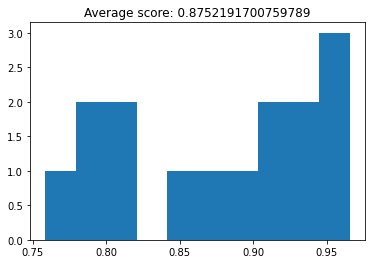

In [196]:
from sklearn.model_selection import cross_val_score

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(cls, all_inputs, all_labels, cv=15)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [199]:
ETsC.append(np.mean(cv_scores))
ETsC

[0.8944954128440367, 0.8752191700759789]

## **2.** LGBM Classifier

### Confusion Matrix & Tuning

In [200]:
from lightgbm import LGBMClassifier

In [203]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cls = LGBMClassifier(num_leaves= 7,
                     learning_rate  = .29,
                     subsample_for_bin  = 20,
                     importance_type  ='gain')
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.8669724770642202
--------------------------------------------------------
------- Confusion Matrix --------

[[ 83  20]
 [  9 106]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       103
           1       0.84      0.92      0.88       115

    accuracy                           0.87       218
   macro avg       0.87      0.86      0.87       218
weighted avg       0.87      0.87      0.87       218

--------------------------------------------------------


In [204]:
LGBM=[]
LGBM.append(0.8669724770642202)

### Cross-validation

''

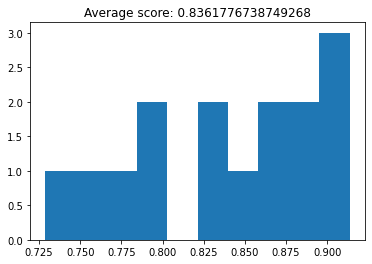

In [208]:
from sklearn.model_selection import cross_val_score

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(cls, all_inputs, all_labels, cv=15)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [209]:
LGBM.append(np.mean(cv_scores))
LGBM

[0.8669724770642202, 0.8361776738749268]

## **3.** Decision Tree Classifier

### Confusion Matrix & Tuning

In [215]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': list(range(21,55,2)),
                  'max_features': list(range(1,8))}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8682210031347962
Best parameters: {'criterion': 'gini', 'max_depth': 49, 'max_features': 3, 'splitter': 'best'}


In [237]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cls = DecisionTreeClassifier(criterion='gini',
                             max_depth=49,
                             max_features=3,
                             splitter='best')
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.8577981651376146
--------------------------------------------------------
------- Confusion Matrix --------

[[ 81  22]
 [  9 106]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       103
           1       0.83      0.92      0.87       115

    accuracy                           0.86       218
   macro avg       0.86      0.85      0.86       218
weighted avg       0.86      0.86      0.86       218

--------------------------------------------------------


In [238]:
DTC=[]
DTC.append(0.8577981651376146)

### Cross-validation

''

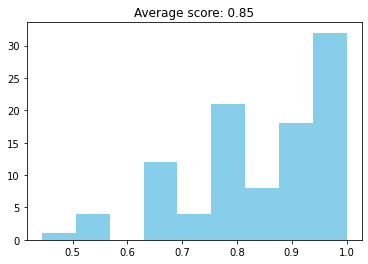

In [266]:
from sklearn.model_selection import cross_val_score

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(cls, all_inputs, all_labels, cv=100)
plt.hist(cv_scores, color='skyblue',bins=9, stacked=True
         )
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [267]:
DTC.append(np.mean(cv_scores))
DTC

[0.8577981651376146, 0.85]

In [71]:
comp_8= pd.DataFrame(ETsC, index=['Acc','Val_acc'], columns=['ETsC'])
comp_8['LGBM']= LGBM
comp_8['DTC']= DTC
comp_8= comp_8.T
comp_8

,Acc,Val_acc
ETsC,0.894495,0.875219
LGBM,0.866972,0.836178
DTC,0.857798,0.850000


In [ ]:
comp_18= pd.DataFrame(ETsC, index=['Acc','Val_acc'], columns=['ETsC'])
comp_18['LGBM']= LGBM
comp_18['DTC']= DTC
comp_18= comp_18.T
comp_18

,Acc,Val_acc
ETsC,0.866972,0.868245
LGBM,0.816514,0.833859
DTC,0.834862,0.874583


In [295]:
comp_8.to_csv('comp_8.csv')

''

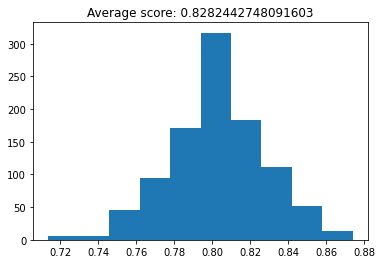

In [271]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.30)
    
    cls.fit(training_inputs, training_classes)
    classifier_accuracy = cls.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
plt.title('Average score: {}'.format(np.mean(classifier_accuracy)))

;

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


''

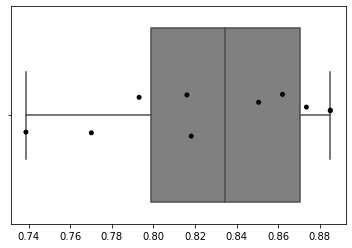

In [272]:
dt_scores = cross_val_score(cls, all_inputs, all_labels, cv=10)

sb.boxplot(dt_scores, color='gray', )
sb.stripplot(dt_scores, jitter=True, color='black')
;

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


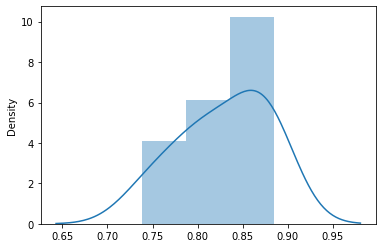

In [273]:
sb.distplot(dt_scores)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


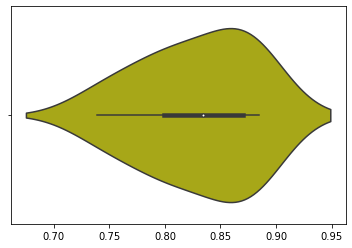

In [274]:
sb.violinplot(dt_scores, color='y')

# Using Neural Networks

In [45]:
import tensorflow as tf
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, 
                                                      test_size=0.2, random_state=1,
                                                      stratify= all_labels )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[8]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.01)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = build_model()

In [58]:
Epochs = 350
history = model.fit(X_train, y_train,epochs=Epochs,
                    validation_split=0.2,)

Epoch 1/350
18/18 [==============================] - 0s 7ms/step - loss: 0.2700 - accuracy: 0.8905 - val_loss: 1.3703 - val_accuracy: 0.7786
Epoch 2/350
18/18 [==============================] - 0s 4ms/step - loss: 0.2781 - accuracy: 0.8869 - val_loss: 1.2227 - val_accuracy: 0.7929
Epoch 3/350
18/18 [==============================] - 0s 4ms/step - loss: 0.2753 - accuracy: 0.8887 - val_loss: 1.1310 - val_accuracy: 0.7500
Epoch 4/350
18/18 [==============================] - 0s 4ms/step - loss: 0.2807 - accuracy: 0.8833 - val_loss: 1.1530 - val_accuracy: 0.7929
Epoch 5/350
18/18 [==============================] - 0s 4ms/step - loss: 0.2735 - accuracy: 0.8923 - val_loss: 1.2084 - val_accuracy: 0.7857
Epoch 6/350
18/18 [==============================] - 0s 4ms/step - loss: 0.2701 - accuracy: 0.8869 - val_loss: 1.2144 - val_accuracy: 0.7714
Epoch 7/350
18/18 [==============================] - 0s 5ms/step - loss: 0.2695 - accuracy: 0.8905 - val_loss: 1.2105 - val_accuracy: 0.7857
Epoch 8/350
1

In [59]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
345,0.257062,0.890485,2.075118,0.778571,345
346,0.254823,0.899461,1.992524,0.800000,346
347,0.244852,0.895871,2.202209,0.792857,347
348,0.242894,0.903052,1.974026,0.800000,348
349,0.262391,0.897666,2.052939,0.771429,349


In [60]:
acc = (hist['accuracy'].tail().sum())*100/5 
val_acc = (hist['val_accuracy'].tail().sum())*100/5 

print("Training Accuracy = {}% and Validation Accuracy= {}%".format(acc,val_acc))

Training Accuracy = 89.7307014465332% and Validation Accuracy= 78.85714411735535%


In [62]:
y_pred = model.predict_classes(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.8171428571428572
--------------------------------------------------------
------- Confusion Matrix --------

[[64 23]
 [ 9 79]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        87
           1       0.77      0.90      0.83        88

    accuracy                           0.82       175
   macro avg       0.83      0.82      0.82       175
weighted avg       0.83      0.82      0.82       175

--------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Conclusion
>Best accuracy was by using **Extra Trees Classifier** with 89.4% accuracy, and an excellent validation accuracy (87.5 %).
The accuracy achieved by using: 
1. Forward filling the NaN, 
2. without using the extracted feature, 
3. DBSCAN Density-Based Spatial Clustering of Applications for outlier detection,
4. Random over sampler to balance the classes


# Step 6:  Reproducibility

In [ ]:
!pip install watermark

In [ ]:
%load_ext watermark

In [ ]:
%watermark -a 'Hazim' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

Hazim Tue Dec 29 2020 

CPython 3.6.9
IPython 5.5.0

numpy 1.19.4
pandas 1.1.5
sklearn 0.0
matplotlib 3.2.2
seaborn 0.11.0

compiler   : GCC 8.4.0
system     : Linux
release    : 4.19.112+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
